## The Sparks Foundation : GRIP Intern - Task 1 - Prediction using Supervised ML 
- Predict the percentage of an student based on the no. of study hours.
- Problem Statement : 
    What will be predicted score if a student studies for 9.25 hrs/ day?

### Simple Linear Regression


- Simple linear regression is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables:
    1. One variable, denoted x, is regarded as the predictor, explanatory, or independent variable.
    2. The other variable, denoted y, is regarded as the response, outcome, or dependent variable.
        y = m(X) + c 
    

### Contents:
1. **[Importing the necessary Libraries](#import)**
2. **[Reading the CSV File](#read)**
3. **[Plotting the Data](#plot)**
4. **[Splitting the Data](#split)**
5. **[Training the Algorithm](#train)**
6. **[Regression plot for Train and Test Data](#plot_reg)**
7. **[Evaluation of the Model](#eval)**
8. **[Prediction of Scores](#pred)**

<a id='import'> </a>
### 1. Importing the Necessary Libraries

In [1]:
# Importing the required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

<a id = 'read'></a>
### 2. Reading the CSV File

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#To find the shape of the data:

data.shape

(25, 2)

- The table contains two columns and 25 rows
- column names:
    1. Hours (Independent Variable)
    2. Scores (Dependent Variable)

In [4]:
# To find if the data has any null values:

data.isnull().sum()

Hours     0
Scores    0
dtype: int64

- Since the data contains no null values, we proceed with visualization and prediction

<a id = 'plot'></a>
### 3. Plotting the data

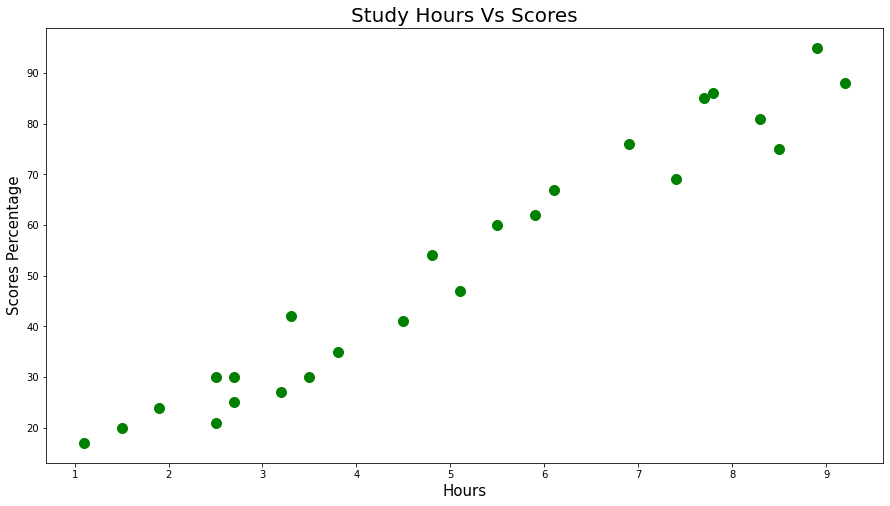

In [5]:
plt.figure(figsize=(15,8))
plt.scatter(data['Hours'],data['Scores'], s=100, color='green')
plt.title("Study Hours Vs Scores", size=20)
plt.xlabel('Hours', size=15)
plt.ylabel('Scores Percentage',size=15)
plt.show()

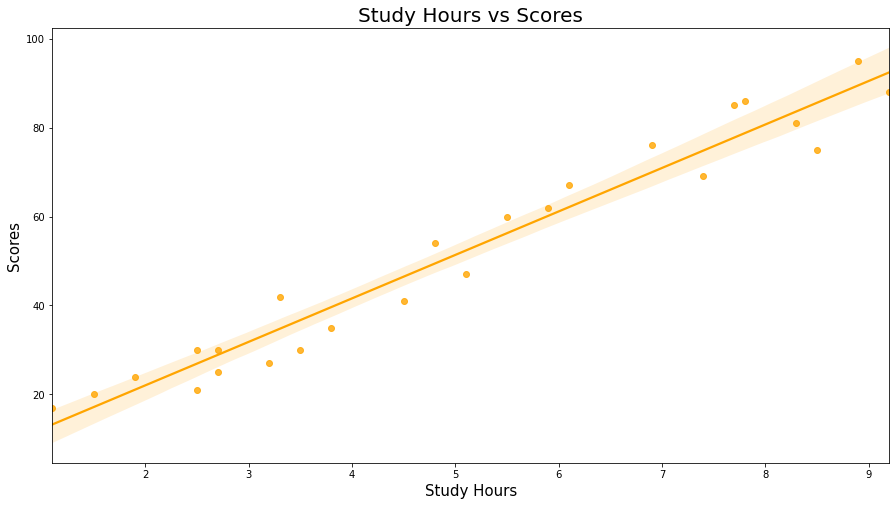

In [6]:
plt.figure(figsize=(15,8))
sns.regplot(data['Hours'],data['Scores'], color='orange')
plt.title('Study Hours vs Scores', size=20)
plt.xlabel('Study Hours', size=15)
plt.ylabel('Scores', size=15)
plt.show()

- From the plot, it can be clearly seen that there is a linear relationship between Study Hours and Scores. 
- As the no. of Study hours increases, the percentage of scores also increases.

<a id='split'></a>
### 4. Splitting the data

In [7]:
# Dividing the data into X(independent Variable) and y(dependent Variable)

X = data.drop('Scores', axis=1)
y = data.drop('Hours', axis=1)

In [8]:
# Splitting the data into train and test data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=40)

- From the above, the X and y are split into test and train datas with test_size of 30%. 
- Now the train data will contain 70% and test data will contain 30% of the original data

In [9]:
# Now checking the train and test data shapes of X
print(X_train.shape,X_test.shape)

(17, 1) (8, 1)


In [10]:
# Now checking the train and test data shapes of X
print(y_train.shape,y_test.shape)

(17, 1) (8, 1)


- From the above it can be clearly seen that both X and y train datas contains 70% of the entire data and both the test datas contain 30% of the data

<a id='train'></a>
### 5. Training the Algorithm

In [11]:
# For training the algorithm, we use Linear Regression.
li_reg = LinearRegression()

# Fitting the train data in the algorithm.
li_reg.fit(X_train,y_train)

LinearRegression()

<a id='plot_reg'></a>
### 6. Regression plot for Train and Test Data

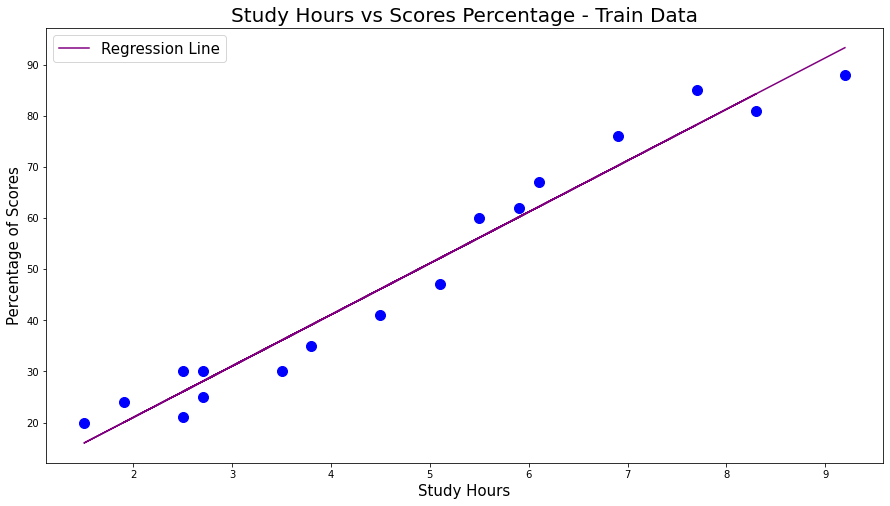

In [12]:
# Predicting the y predicted values for train data using predict attribute  
y_train_pred = li_reg.predict(X_train)

# Plotting the regressing line 
plt.figure(figsize=(15,8))
plt.scatter(X_train,y_train,s=100,color='blue')
plt.plot(X_train,y_train_pred, color='purple', Label = 'Regression Line')
plt.title("Study Hours vs Scores Percentage - Train Data", size=20)
plt.xlabel('Study Hours', size=15)
plt.ylabel('Percentage of Scores', size = 15)
plt.legend(fontsize=15)
plt.show()



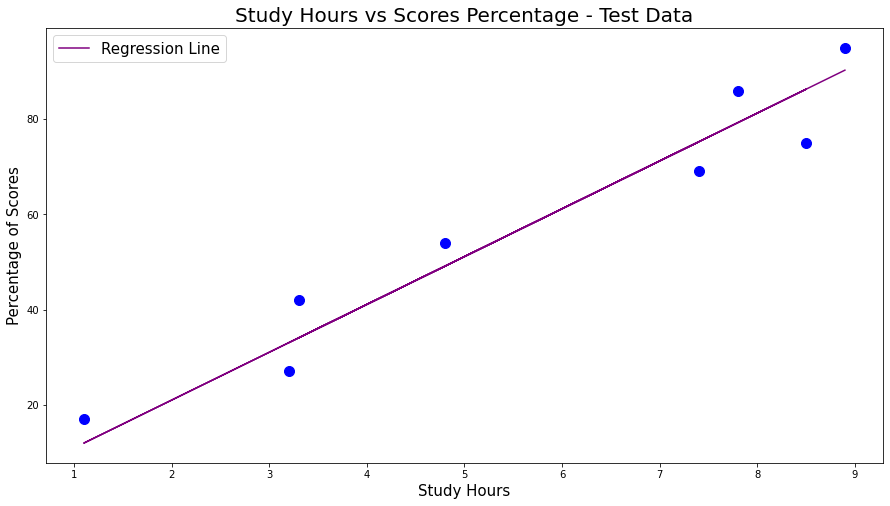

In [13]:
# Predicting the y predicted values for test data using predict attribute
y_test_pred = li_reg.predict(X_test)

# Plotting the regression line
plt.figure(figsize = (15,8))
plt.scatter(X_test,y_test, color='blue',s=100)
plt.plot(X_test,y_test_pred, color='purple', Label = 'Regression Line')
plt.title("Study Hours vs Scores Percentage - Test Data", size=20)
plt.xlabel('Study Hours', size=15)
plt.ylabel('Percentage of Scores', size = 15)
plt.legend(fontsize=15)
plt.show()


In [14]:
li=y_test_pred.flatten()

In [15]:
data = list(zip(y_test,li))
df = pd.DataFrame(data,columns = ['Actual','Predicted'])
df

,Actual,Predicted
0,Scores,90.279155


<a id='eval'></a>
### 7. Evaluation of  the Model

In [16]:
# Evaluating the model using R2 Score.

print('The R2 score of the train model is :',r2_score(y_train, y_train_pred))
print('The R2 score of the test model is :',r2_score(y_test, y_test_pred))

The R2 score of the train model is : 0.9623919141966742
The R2 score of the test model is : 0.930188764896189


- Since the R2 score of the model is close to 1, It is considered as robust model

<a id='pred'></a>
### 8. Prediction of Scores.

In [26]:
a = float(input("Enter the Number of Hours: "))

hours = [[a]]

pred_score = li_reg.predict(hours)

pred_score = round(pred_score.flatten()[0],2)

print('The Predicted score is {}, When the person studies for {} hours.'.format(pred_score, hours[0]))

Enter the Number of Hours: 9.25
The Predicted score is 93.79, When the person studies for [9.25] hours.
